## Assignment 1

Q1. Can you write you own Hopfield network model that works more or less like the one simulated above? (20 points)

In [1]:
import numpy as np
from copy import deepcopy
from neurodynex3.hopfield_network import plot_tools

ModuleNotFoundError: No module named 'numpy'

In [19]:
def get_patterns(psize, num_patterns):
    patterns = []
    for _ in range(num_patterns):
        pattern = np.random.choice([0, 1], size=(psize, psize))
        patterns.append(pattern)
    return patterns

# Introducing noise to the new created deepcopy "cue"
def perturb_pattern(pattern, num_flips):
    # Creates a shallow copy
    noisy_pattern = pattern.copy()
    flat_pattern = noisy_pattern.flatten()
    indices = np.random.choice(len(flat_pattern), num_flips, replace=False)
    flat_pattern[indices] = 1 - flat_pattern[indices]
    noisy_pattern = flat_pattern.reshape(pattern.shape)
    return noisy_pattern

def calculate_weights(plist, psize):
    # Creates 16 neurons corresponding to pixels of pattern
    nr_neurons = psize**2
    # Creates 16X16 weight matrix to hold wieghts of neurons
    wghts = np.zeros((nr_neurons, nr_neurons))

    for pattern in plist:
        pattern = pattern.flatten()
        pattern = pattern.reshape((nr_neurons, 1))
        wghts += np.dot(pattern, pattern.T)
    
    # Removing self connections
    wghts -= len(plist) * np.eye(nr_neurons)
    return wghts

def network_evolution(pnoisy, wghts):
    # noisy pattern converted into 16X1 vector
    pnoisy_flat = pnoisy.flatten()
    updated_pnoisy = np.dot(pnoisy_flat, wghts)
    updated_pnoisy = (updated_pnoisy > 0).astype(int)
    return updated_pnoisy.reshape(pnoisy.shape)


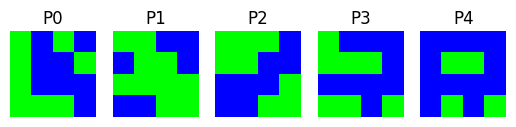

In [20]:
pattern_size = 4
no_of_patterns = 5

pattern_list = get_patterns(pattern_size, no_of_patterns)
# Plotting original patterns
plot_tools.plot_pattern_list(pattern_list)

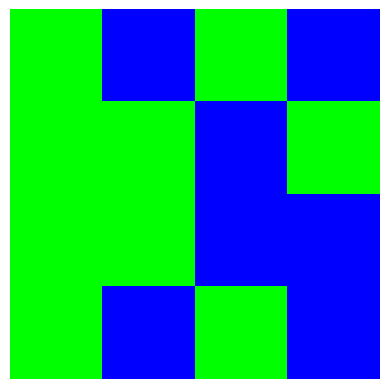

In [21]:
weights = calculate_weights(pattern_list, pattern_size)
# print(weights)

# Creating a deep level copy of our pattern list
cue = deepcopy(pattern_list)
no_of_flips = 3
initial_state = perturb_pattern(cue[0], no_of_flips)
plot_tools.plot_pattern(initial_state)

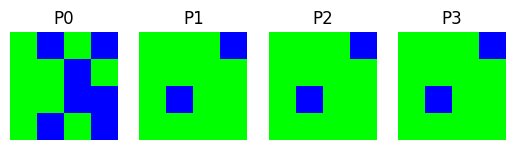

In [22]:
state_list =[initial_state]
for i in range(3):
    state_list.append(network_evolution(initial_state, weights))

plot_tools.plot_pattern_list(state_list)

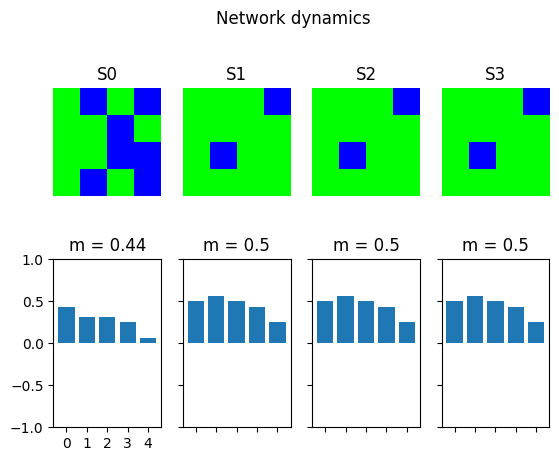

In [23]:
plot_tools.plot_state_sequence_and_overlap(state_list, pattern_list, reference_idx=0, suptitle="Network dynamics")